In [1]:
from pyntcloud import PyntCloud
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

In [2]:
lidar_cloud = PyntCloud.from_file(os.path.join("data", "lidar_data02.pcd"))
lcpoints = lidar_cloud.points

# Display the star shape from rotating rectangles

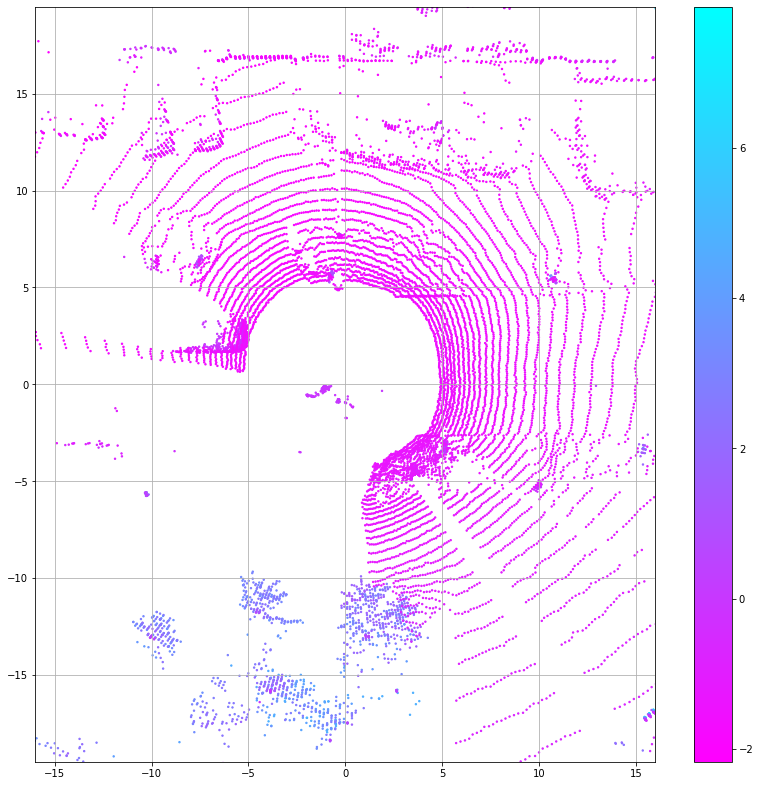

In [3]:
cm1 = plt.cm.get_cmap("cool_r")
cm2 = plt.cm.get_cmap("turbo")
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig1 = plt.figure(figsize=(1000*px, 1000*px))
lcpoints = lcpoints[lcpoints.x > -20].dropna()
lcpoints = lcpoints[lcpoints.x <  20].dropna()
lcpoints = lcpoints[lcpoints.y > -20].dropna()
lcpoints = lcpoints[lcpoints.y <  20].dropna()
filter_arr = (lcpoints.x > 0.00001) | (lcpoints.x < -0.00001) | (lcpoints.y > 0.00001) | (lcpoints.y < -0.00001)
lcpoints = lcpoints[filter_arr]
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, s=2.0, cmap=cm1)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()

## Select a single channel (ring) and mark it with black and the polar grids (deg)

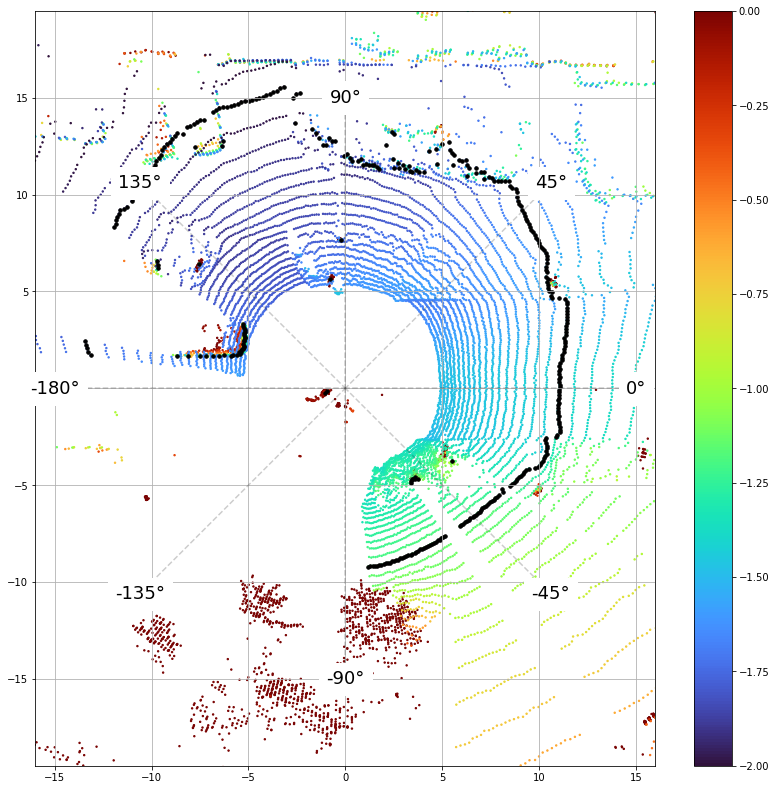

In [4]:
lcpoints_1ring = lcpoints[lcpoints.ring == 45].dropna()
plt.figure(figsize=(1000*px, 1000*px))
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, vmin = -2, vmax = 0, s=2.0, cmap=cm2)
plt.colorbar()
plt.scatter(lcpoints_1ring.x, lcpoints_1ring.y, c = "#000000", s=12)
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
polar_grid = np.arange(-180, 180,45)
for p in polar_grid:
    x1 = np.cos(np.deg2rad(p))*15; y1 = np.sin(np.deg2rad(p))*15
    plt.plot([x1,0], [y1,0], "k--", alpha=0.2)
    plt.text(x1, y1, str(p)+"°", horizontalalignment="center", verticalalignment="center", backgroundcolor="white", fontsize=18)
plt.show()

## `ring_new_x` is the oreintation representation of a single channel
`ring_new_x` is degree-based (-180°, 180°), but can changed to 0°-360° with  `np.where(ring_new_x < 0, ring_new_x + 360, ring_new_x)`

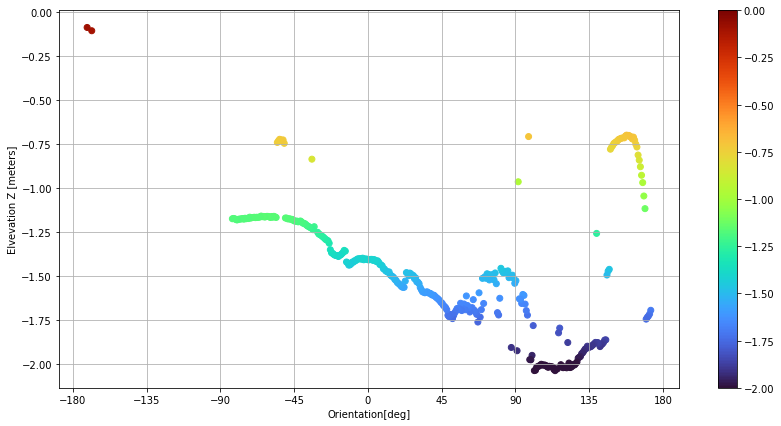

In [5]:
fig3 = plt.figure(figsize=(1000*px, 500*px))
ring_new_x = np.arctan2(lcpoints_1ring.y, lcpoints_1ring.x) / np.math.pi * 180 
#ring_new_x = np.where(ring_new_x < 0, ring_new_x + 360, ring_new_x)
#print(ring_new_x.astype(int))
plt.scatter(ring_new_x, lcpoints_1ring.z, c = lcpoints_1ring.z, vmin = -2, vmax = 0, cmap=cm2)
plt.xticks(np.arange(-180,181,45))
plt.colorbar()
plt.grid()
plt.xlabel("Orientation[deg]")
plt.ylabel("Elvevation Z [meters]")
plt.show()

# Sort the array

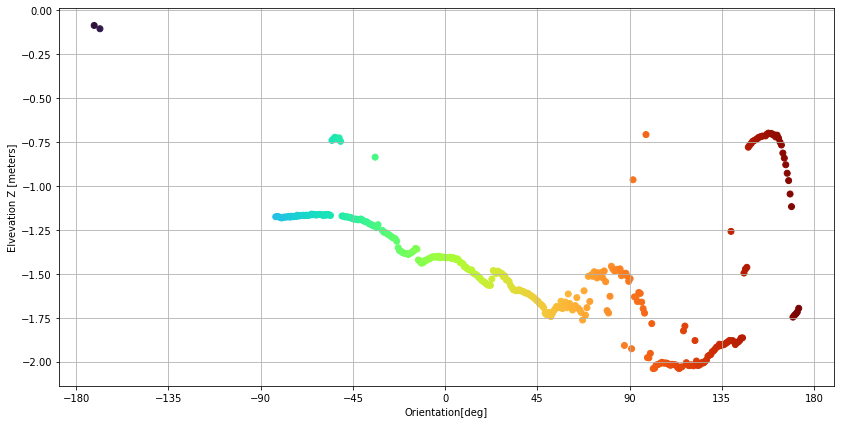

In [6]:
# sort ring_new_x and Z coordinates according the ring_new_x
sorted_ring = np.array(list(zip( *sorted(zip(ring_new_x, lcpoints_1ring.z)))))
plt.figure(figsize=(1000*px, 500*px))
plt.scatter(sorted_ring[0], sorted_ring[1], c = sorted_ring[0], cmap=cm2)
plt.xticks(np.arange(-180,181,45))
plt.grid()
plt.xlabel("Orientation[deg]")
plt.ylabel("Elvevation Z [meters]")
plt.show()

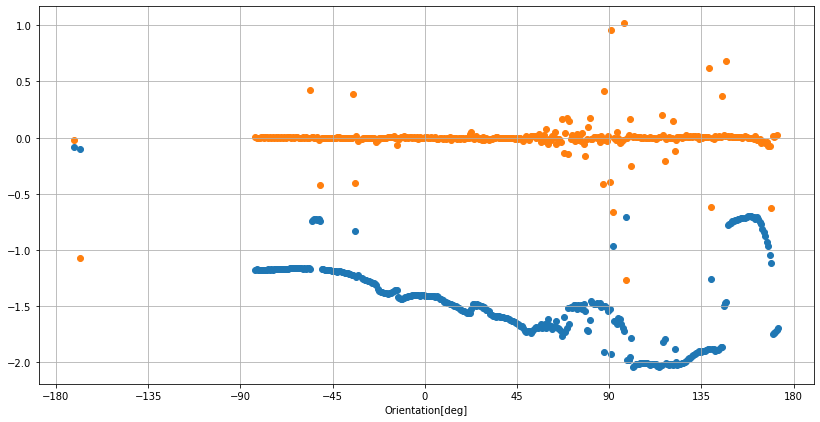

In [7]:
# make a diff
diff_ring = np.diff(sorted_ring)
plt.figure(figsize=(1000*px, 500*px))
plt.scatter(sorted_ring[0], sorted_ring[1])
plt.scatter(sorted_ring[0][:-1], diff_ring[1])
plt.xticks(np.arange(-180,181,45))
plt.grid()
plt.xlabel("Orientation[deg]")
plt.show()
 

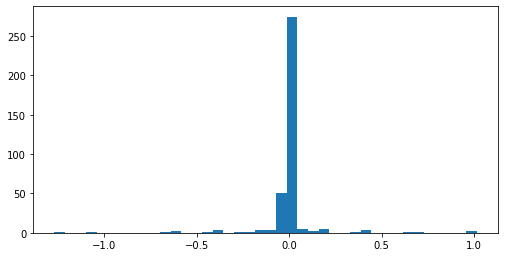

In [8]:
plt.figure(figsize=(600*px, 300*px))
plt.hist(diff_ring[1], bins = 40)
plt.show()

# Plot the differences

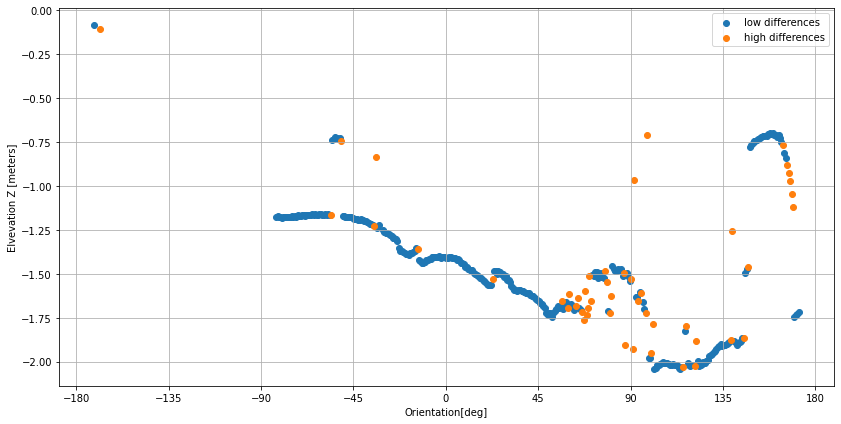

In [9]:
d1 = np.ma.masked_outside(diff_ring[1],-0.04,0.04)
plt.figure(figsize=(1000*px, 500*px))
plt.scatter(sorted_ring[0][:-1][~d1.mask], sorted_ring[1][:-1][~d1.mask], label = "low differences")
plt.scatter(sorted_ring[0][:-1][d1.mask], sorted_ring[1][:-1][d1.mask], label = "high differences")
plt.xticks(np.arange(-180,181,45))
plt.grid()
plt.legend()
plt.xlabel("Orientation[deg]")
plt.ylabel("Elvevation Z [meters]")
plt.show()